c:\Users\Admin\Documents\Woche_16_10.03.25-14.03.25\10.03.25\titanic_analysis\notebooks\../src\datenvorbereitung.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].fillna(df['age'].median(), inplace=True)
c:\Users\Admin\Documents\Woche_16_10.03.25-14.03.25\10.03.25\titanic_analysis\notebooks\../src\datenvorbereitung.py:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will 

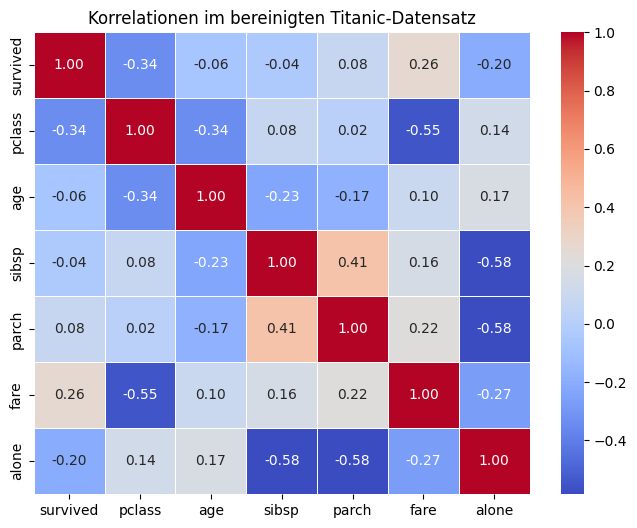

In [19]:
import sys
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Sicherstellen, dass src als Modul erkannt wird
sys.path.append("../src")

# Funktionen aus der Datei importieren
from datenvorbereitung import lade_titanic_daten, bereinige_daten

# Titanic-Daten laden und bereinigen
df = lade_titanic_daten()
df_cleaned = bereinige_daten(df)

# Nur numerische Spalten für die Korrelation auswählen
corr_matrix = df_cleaned.corr(numeric_only=True)

# Korrelationen als Heatmap visualisieren
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Korrelationen im bereinigten Titanic-Datensatz")

# Diagramm speichern als PNG
plt.savefig(r'C:\Users\Admin\Documents\Woche_16_10.03.25-14.03.25\10.03.25\titanic_analysis\results\correlation_heatmap.png')

plt.show()



#### **Farbskala:**

##### **Rot (Positive Korrelation, nahe +1):** Wenn eine Variable steigt, steigt auch die andere.

##### **Blau (Negative Korrelation, nahe -1):** Wenn eine Variable steigt, sinkt die andere.

##### **Weiß oder Hellgrau (Nahe 0):** Keine starke Beziehung zwischen den Variablen.
---

#### **Wichtige Zusammenhänge**

#### **1.** pclass und survived
- Korrelation: Stark negativ (-0.34)
- Bedeutung: Passagiere aus der 1. Klasse hatten eine höhere Überlebenswahrscheinlichkeit . Umgekehrt hatten Passagiere der 3. Klasse eine geringere       Wahrscheinlichkeit zu überleben.
- Erklärung: In der Titanic-Katastrophe wurden wohlhabendere Passagiere (1. Klasse) bevorzugt evakuiert. Diese Korrelation ist oft einer der stärksten Indikatoren für das Überleben.
#### **2.** age und survived
- Korrelation: Gering (-0.06 also nahezu 0)
- Bedeutung: Das Alter hat keinen sehr starken Einfluss auf das Überleben, aber es könnte sich lohnen, Altersgruppen zu betrachten (z. B. Kinder und ältere Menschen).
- Erklärung: Kinder und junge Erwachsene könnten eine höhere Überlebenschance gehabt haben, aber die Korrelation ist insgesamt nicht besonders stark.
#### **3.** fare und pclass
- Korrelation: Stark negativ (-0.55)
- Bedeutung: Der Ticketpreis (fare) nimmt ab, je niedriger die Klasse des Passagiers ist. Passagiere der 1. Klasse zahlen wesentlich mehr für ihren Ticketpreis im Vergleich zu denen der 3. Klasse.
- Erklärung: Das Preismodell des Titanic-Schiffs war so strukturiert, dass Passagiere der 1. Klasse deutlich mehr für ihre Tickets bezahlten.
#### **4.** survived und sibsp
- Korrelation: Gering (- 0.04 also nahezu 0)
- Bedeutung: Passagiere mit mehr Geschwistern oder Ehepartnern an Bord könnten höhere Überlebenschancen gehabt haben, da sie in Familiengruppen zusammenreisten.
- Erklärung: Passagiere, die mit ihrer Familie reisen, könnten in den Evakuierungsbemühungen bevorzugt worden sein.
#### **5.** survived und fare
- Korrelation: Gering (0.26)
- Bedeutung: Der Ticketpreis (fare) hat eine geringe positive Korrelation zum Überleben. Passagiere, die höhere Ticketpreise zahlen, hatten tendenziell auch eine höhere Chance zu überleben.
- Erklärung: Höhere Ticketpreise waren oft ein Indikator für Passagiere der 1. und 2. Klasse, die bessere Chancen auf Evakuierung hatten.
#### **6.** alone und survived
- Korrelation: Gering (-0.2)
- Bedeutung: Alleinreisende Passagiere hatten eine höhere Wahrscheinlichkeit zu überleben. Dies könnte darauf hindeuten, dass in einigen Fällen (besonders bei Frauen und Kindern) alleinreisende Passagiere bei der Evakuierung bevorzugt wurden.
- Erklärung: Alleinreisende könnten schneller und einfacher evakuiert werden, da sie keine Familie begleiten müssten.
#### **7.** pclass und alone
- Korrelation: Gering (0.14)
- Bedeutung: Es gibt eine geringe positive Korrelation zwischen der Passagierklasse und ob jemand allein reiste . Passagiere der höheren Klassen reisten tendenziell nicht allein, während Passagiere der 3. Klasse oft allein reisten.
- Erklärung: Wohlhabendere Passagiere hatten möglicherweise mehr Begleitung, während ärmere Passagiere eher allein reisten.